# Pymaceuticals Inc.
---

### Analysis

Both Capomulin and Ramicane are more effective at slowing the rate of tumor growth than than other drugs. Both of the drugs performed better than placebo. We even noticed that Capomulin was able to reduce the tumor size in one mouse, we could investigate more to see if this holds true for all mice studied with this drug. All other drugs failed to significantly outperform placebo. 

It should be noted that both Capomulin and Ramicane were observed more frequently than the other drugs. It's not clear from the data why this is - we might speculate that mice on placebo/other regimens expired earlier than Capomulin/Ramicane mice.

There is a strong correleation between a mouse's weight and the size of its tumor. However, the implications of this are unclear. Is the tumor size merely proportional to the size of the mouse, or do overweight mice get significantly larger tumors compared to "skinny" mice? We might expect the latter based on other overweight/obese cancer studies - but I did not plot the data to answer this question.

Study was well-balanced between male and female mice so we have eliminated that as a consideration of drug effects.


RECOMMENDATION: focus future studies on the two best drugs, investigate correlation between tumor size and mouse weight, prep for human trials - do our drugs have nasty side effects?




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


study_results.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Combine the data into a single DataFrame
#  study_results LEFT
#  mouse_metadata RIGHT
mousepharm_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
# Display the data table for preview

mousepharm_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
micecount = mousepharm_df["Mouse ID"].unique()
len(micecount)

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mousepharm_df[mousepharm_df.duplicated(subset=["Mouse ID",'Timepoint'])]
duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanpharm_df=mousepharm_df.drop_duplicates(subset=["Mouse ID", "Timepoint"],keep='first')
checkrows = cleanpharm_df.iloc[860:869]
checkrows



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
870,g989,25,56.045564,1,Propriva,Female,21,26
871,g989,30,59.082294,1,Propriva,Female,21,26
872,g989,35,62.570880,2,Propriva,Female,21,26
873,z314,0,45.000000,0,Stelasyn,Female,21,28


In [8]:
# Checking the number of mice in the clean DataFrame.
micecount = cleanpharm_df["Mouse ID"].unique()
len(micecount)

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug 
# regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# cleanpharm_df.head()

#mean
meantumor=cleanpharm_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
# print(meantumor_df)

# median
mediantumor=cleanpharm_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
# mediantumor_df.head()

# variance
vartumor=cleanpharm_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
# vartumor_df.head()

# standard deviation
stdtumor=cleanpharm_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
# stdtumor_df.head()

# SEM
SEMtumor=cleanpharm_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# SEMtumor_df.head()

# Assemble the resulting series into a single summary DataFrame.
drugdata_df=pd.DataFrame({"Mean Tumor Volume": meantumor,
                         "Median Tumor Volume":mediantumor,
                          "Tumor Volume Variance":vartumor,
                          "Tumor Volume Std. Dev.":stdtumor,
                          "Tumor Volume Std. Err.":SEMtumor
                         })
drugdata_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, 
# standard deviation,and SEM of the tumor volume for each regimen 
# (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

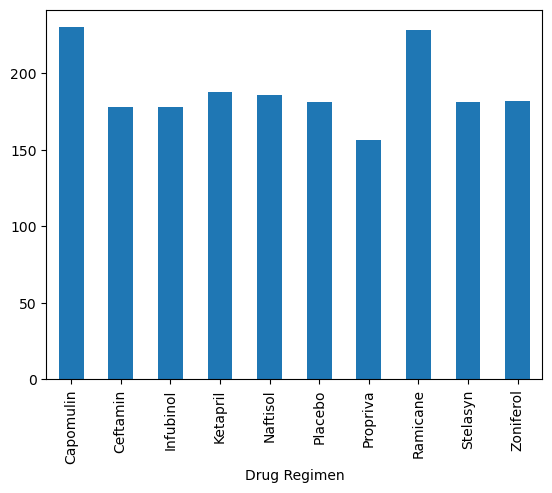

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen
# using Pandas.
miceondrugs=cleanpharm_df.groupby(["Drug Regimen"])["Mouse ID"].count()

figure1 = miceondrugs.plot(kind = 'bar')

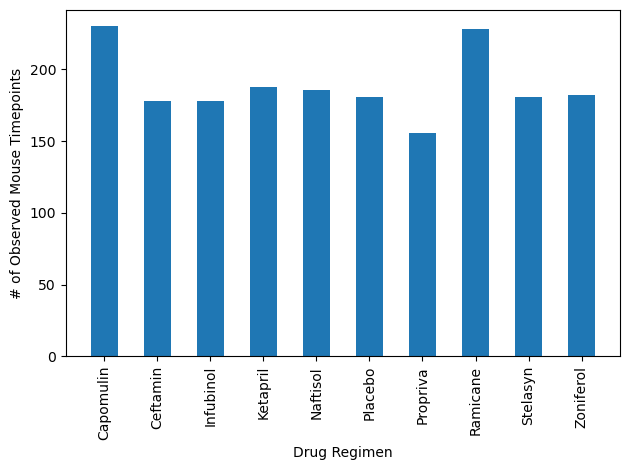

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen 
# using pyplot.

miceondrugs=cleanpharm_df.groupby(["Drug Regimen"])["Mouse ID"].count()

columns = cleanpharm_df["Drug Regimen"].unique()
columns_sorted = sorted(columns)  # Sort the unique values

x_axis = np.arange(len(columns_sorted))

# tick_locations = [value for value in x_axis]
plt.xticks(x_axis,columns_sorted, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis, miceondrugs, width=0.5)
plt.tight_layout()
plt.show()


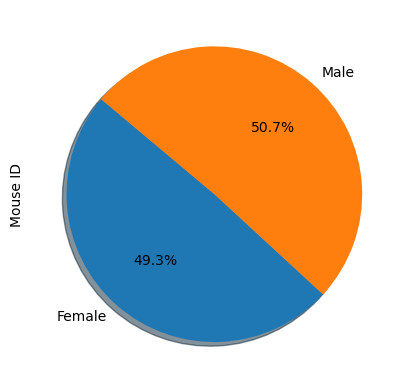

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
boysgirls=cleanpharm_df.groupby(["Sex"])["Mouse ID"].count()
figure2 = boysgirls.plot(kind = 'pie', autopct="%1.1f%%", shadow = True, startangle = 140)

([<matplotlib.patches.Wedge at 0x24b2ee05e40>,
 [Text(-0.7265028750894215, -0.8259501029038041, 'Female'),
  Text(0.7265029524204479, 0.8259500348836922, 'Male')],
 [Text(-0.3962742955033208, -0.45051823794752943, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

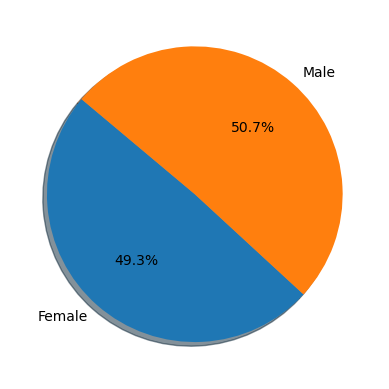

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

boysgirls=cleanpharm_df.groupby(["Sex"])["Mouse ID"].count()
# boysgirls
sexes = ["Female", "Male"]

plt.pie(boysgirls, labels = sexes, autopct="%1.1f%%", shadow = True, startangle = 140)

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# shortdrugslist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

qobdata_df = cleanpharm_df.groupby(["Mouse ID"])["Timepoint"].max()

# Start by getting the last (greatest) timepoint for each mouse
qobdata_df = qobdata_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finaltumor_df = qobdata_df.merge(cleanpharm_df, on=['Mouse ID', 'Timepoint'], how='left')

# Print the final tumor volume DataFrame
finaltumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [77]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
mt_list = []

     
    
# Locate the rows which contain mice on each drug and get the tumor volumes



for drug in treatment_list:
    Tumor_Volume = finaltumor_df.loc[finaltumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    mt_list.append(Tumor_Volume)
    quartiles = Tumor_Volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = Tumor_Volume.loc[(Tumor_Volume < lower_bound) |  (Tumor_Volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")                            
   


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


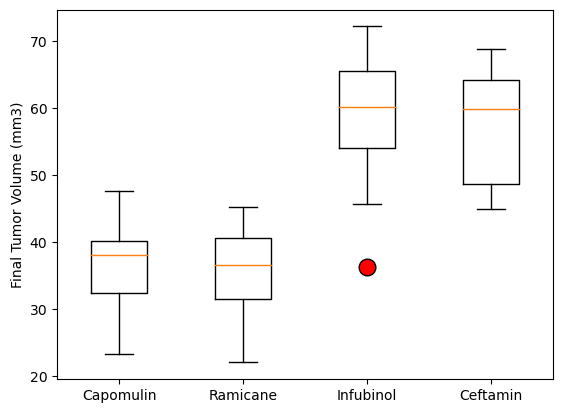

In [75]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(mt_list,labels = treatment_list, flierprops = {'markerfacecolor': 'red', 'markersize': 12})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

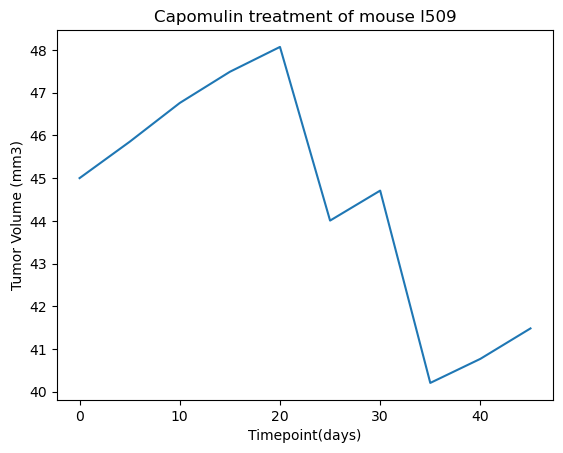

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# mouse id is i509 and it only received Capomulin. Thanks!
thismouse = 'l509'

mouse509=cleanpharm_df.loc[cleanpharm_df['Mouse ID']==thismouse]

tumor509 = mouse509["Tumor Volume (mm3)"]

# tumor509

x_axis = np.arange(0,50,5)

plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.plot(x_axis, mouse509["Tumor Volume (mm3)"])

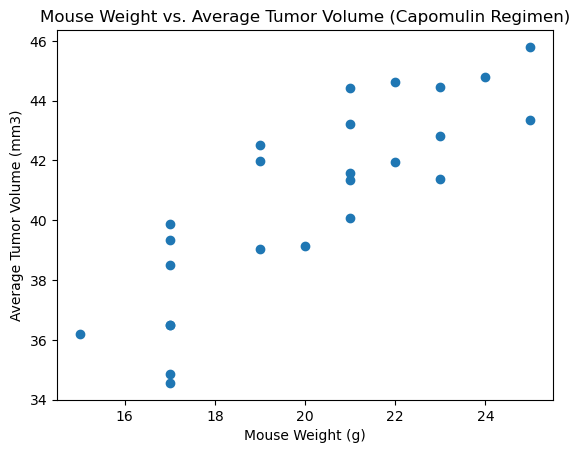

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
thisdrug = 'Capomulin'

capreg=cleanpharm_df.loc[cleanpharm_df['Drug Regimen']==thisdrug]

# Group the data by mouse ID and calculate the average tumor volume
avgvolume = capreg.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Retrieve the mouse weight and average tumor volume data
mouseweight = capreg.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot
plt.scatter(mouseweight, avgvolume)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


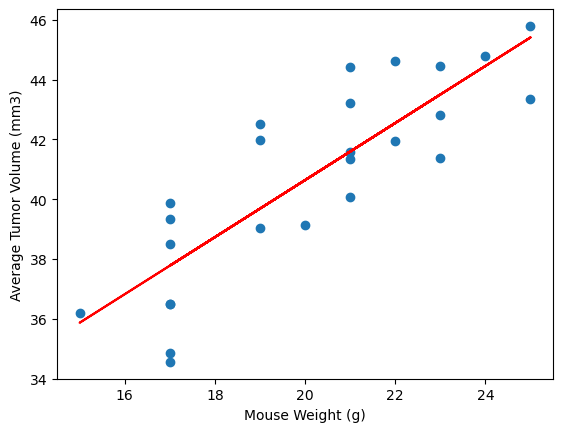

In [48]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient, p_value = st.pearsonr(mouse_weight, average_tumor_volume)
print("The correlation between mouse weight and the average tumor volume is {:.2f}".format(correlation_coefficient))

# Create a linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

# Create a scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# Add the regression line to the plot
plt.plot(mouse_weight, intercept + slope * mouse_weight, color='red')

plt.show()

